In [2]:
"""Context
Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

Content
This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

Acknowledgements
This public dataset is part of Airbnb, and the original source can be found on this website.

"""

'Context\nSince 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.\n\nContent\nThis data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.\n\nAcknowledgements\nThis public dataset is part of Airbnb, and the original source can be found on this website.\n\n'

Predict NYC Airbnb Rental Prices
Brian Roach · 1 Submission

Task Details
As of August 2019, this data set contains almost 50 thousand airbnb listings in NYC. The purpose of this task is to predict the price of NYC Airbnb rentals based on the data provided and any external dataset(s) with relevant information.

Expected Submission
Users should submit a csv file with each listing from the data set and the model-predicted price:

id, price
2539, 149
2595, 225
3647, 150
...
Evaluation
A solution with low root-mean-squared error (RMSE) based on cross-validation that can be reproduced and interpreted is ideal. Given the limited number of variables in this dataset, accurate predictions will be difficult.

 We may want to engineer the Name feature to extract Title as a new feature.


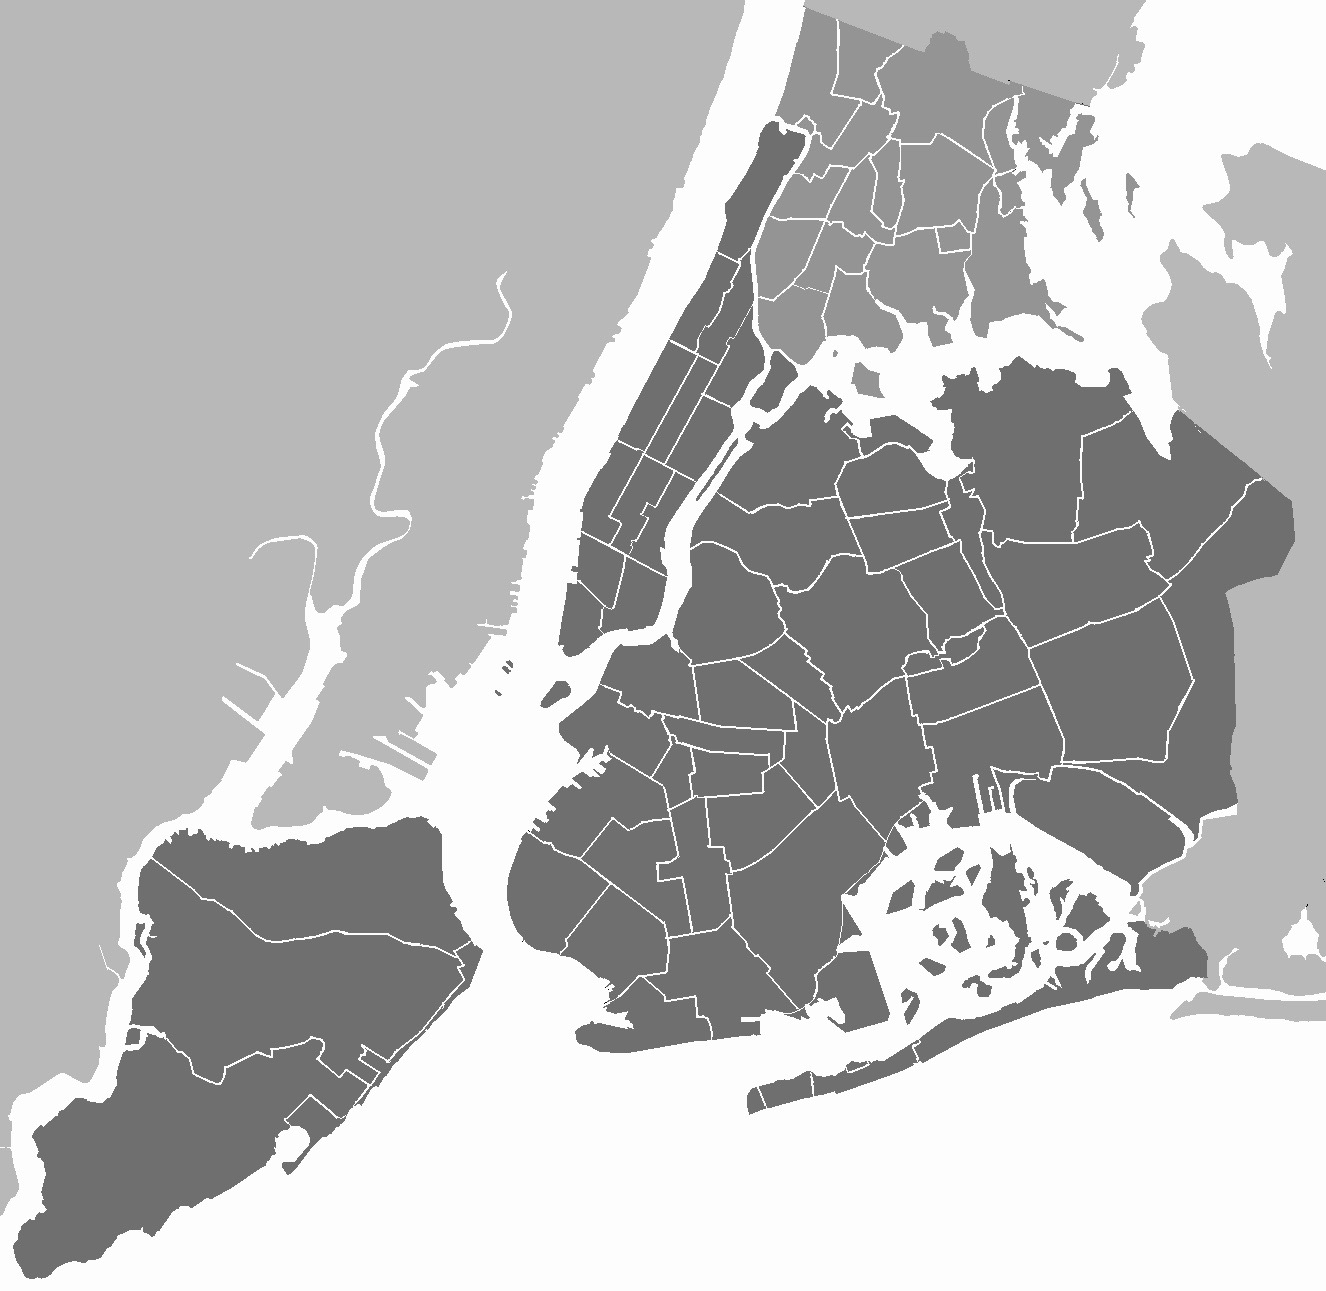

In [3]:
#New York City
import os
from PIL import Image 

os.chdir("../soheil")
img = Image.open("New_York_City_.png")
img

In [6]:
# Importing the Libraries¶
import numpy as np
import pandas as pd

import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge

import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import OneHotEncoder

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import plotly.express as px

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score


In [7]:
# Load AirBnB Data
ab = pd.read_csv('AB_NYC_2019.csv')

In [8]:
# Create a copy of data
# different between copy and deepcopy in python
ab_copy =ab.copy()

In [9]:
ab.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [10]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [11]:
ab.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

In [12]:
ab.describe(include='O')

name host_name neighbourhood_group neighbourhood  \
count            48879     48874               48895         48895   
unique           47905     11452                   5           221   
top     Hillside Hotel   Michael           Manhattan  Williamsburg   
freq                18       417               21661          3920   

              room_type last_review  
count             48895       38843  
unique                3        1764  
top     Entire home/apt  2019-06-23  
freq              25409        1413

ab.minimum_nights[ab.minimum_nights>70]=np.nan

Feature Engineering¶


In [13]:
#Find out missing values in Dataset
np.sum(pd.isnull(ab))

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

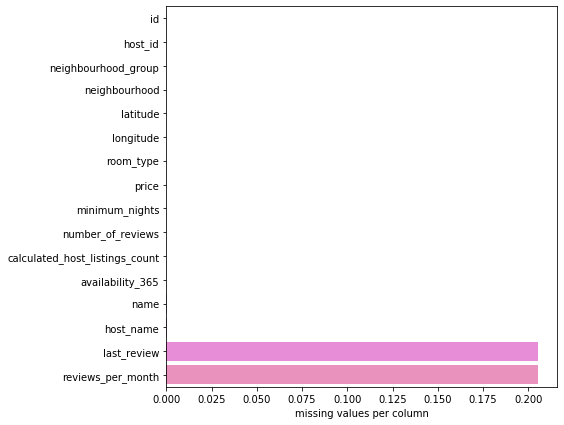

In [14]:
#Missing values
#How many missing values are there for each feature?  

missing_values = pd.isnull(ab).sum()/len(ab)
miss_values = pd.DataFrame(data = missing_values,index = ab.columns, columns =['missing values per column'])

miss_val = miss_values.sort_values(by='missing values per column')
plt.figure(figsize=(7,7))
sns.barplot(x='missing values per column',y=miss_val.index, data =miss_val)
plt.show()

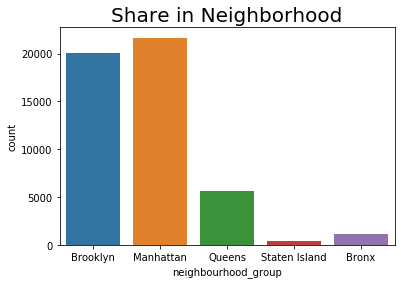

In [15]:
plt.title('Share in Neighborhood',fontsize=20)
sns.countplot(x='neighbourhood_group', data = ab)
plt.show()

In [16]:
fig = px.pie(ab,  names='neighbourhood_group', title='Share in Neighborhood')
fig.show()

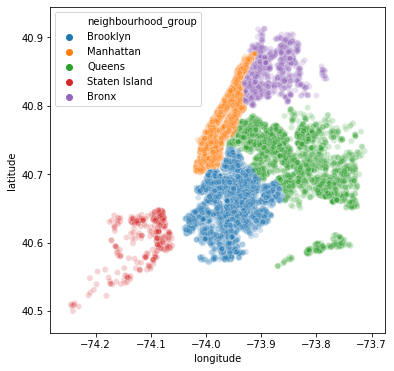

In [17]:
plt.figure(figsize=(6,6))
sns.scatterplot(x="longitude", y="latitude", data=ab, hue='neighbourhood_group',alpha=0.2)
plt.show()

In [18]:
ab.availability_365.head()

0    365
1    355
2    365
3    194
4      0
Name: availability_365, dtype: int64

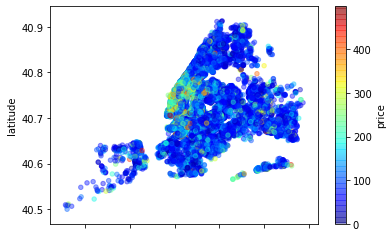

In [19]:
ab.loc[ab['price']<500].plot.scatter(x='longitude',
                y='latitude',
                c='price',
                colormap ='jet',alpha=0.4)
plt.show()

In [20]:
ab[['neighbourhood', 'price']].groupby(['neighbourhood'], as_index=False).median().sort_values(by='price', ascending=False)[0:10]

neighbourhood  price
82       Fort Wadsworth  800.0
219             Woodrow  700.0
197             Tribeca  295.0
139            Neponsit  274.0
144                NoHo  250.0
215         Willowbrook  249.0
75    Flatiron District  225.0
127             Midtown  210.0
73   Financial District  200.0
209        West Village  200.0

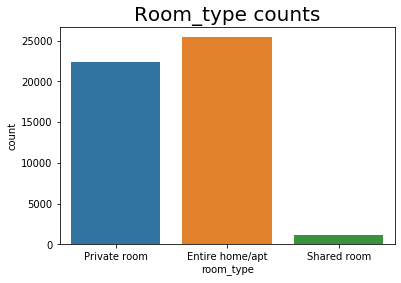

In [21]:
plt.title('Room_type counts',fontsize=20)
sns.countplot(x='room_type', data = ab)
plt.show()

In [22]:
fig = px.pie(ab,  names='room_type', title='Share in room_type')
fig.show()

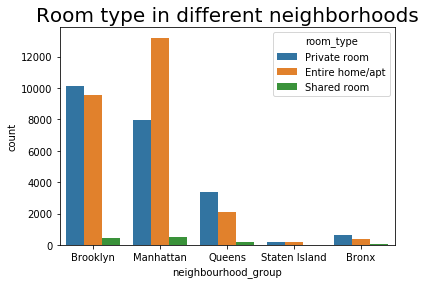

In [23]:
plt.title('Room type in different neighborhoods',fontsize=20)
sns.countplot(x='neighbourhood_group', hue ='room_type' , data = ab)
plt.show()

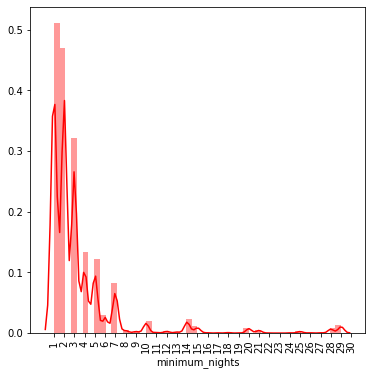

In [24]:
plt.figure(figsize=(6,6))
sns.distplot(ab.loc[ab['minimum_nights']<30]['minimum_nights'], color='red')
plt.xticks(np.arange(min(ab['minimum_nights']), 31, 1), rotation=90)

plt.show()

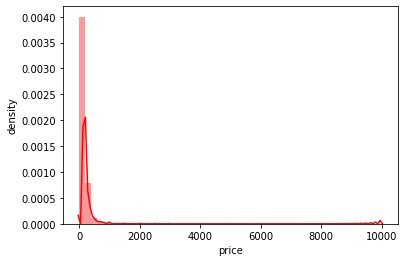

In [25]:
plt.ylabel('density')

sns.distplot(ab['price'], color='red')
plt.show()

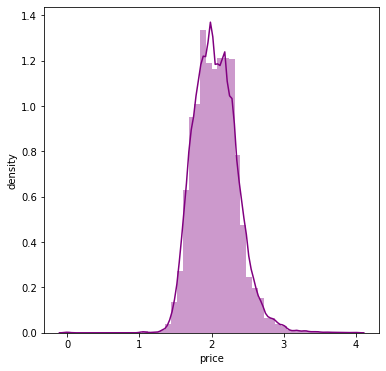

In [26]:
#price distribution with natural log
plt.figure(figsize=(6,6))
plt.ylabel('density')
sns.distplot(np.log10(1+ ab['price']), color='purple')
plt.show()

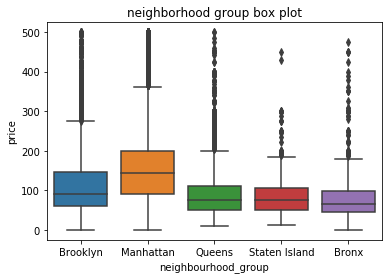

In [27]:
plt.title("neighborhood group box plot")
sns.boxplot(x="neighbourhood_group", y="price", data=ab.loc[ab['price']<500])
plt.show()

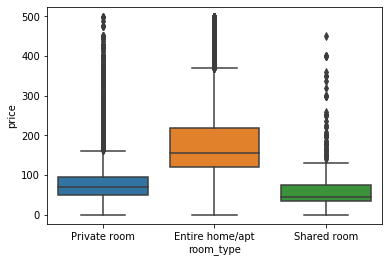

In [28]:
sns.boxplot(x="room_type", y="price", data=ab_copy[ab_copy['price']<500])
plt.show()

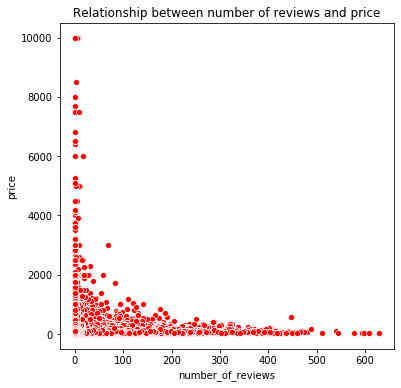

In [29]:
plt.figure(figsize=(6,6))
plt.title("Relationship between number of reviews and price")
sns.scatterplot(x = 'number_of_reviews',y = 'price',data = ab,color='red')
plt.show()

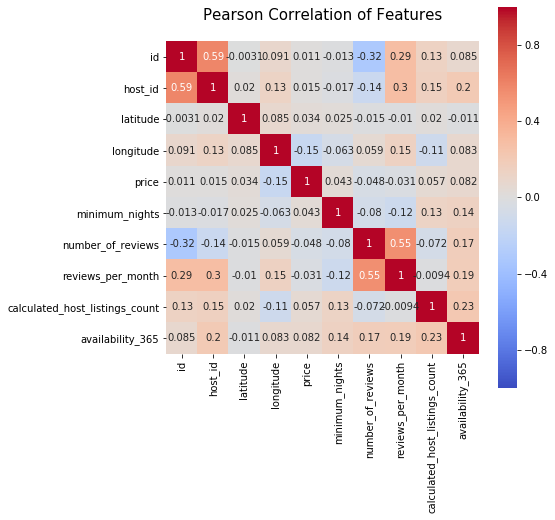

In [30]:
#Correlation Matrix
fig = plt.figure(figsize=[7,7])
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(ab.corr(), annot = True, square=True,linecolor='white',cmap='coolwarm',vmin=-1, vmax = 1 )
plt.show()

In [31]:
#what is collinearity??
# cardinality (decrease cardinality of categorical variables)
# categorical correlation

In [32]:
ab.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [33]:
ab.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

In [34]:
# Remove observations with price equal to 0 (faulty records). 
ab = ab[ab['price']!=0]

#Drop categorical features in order to apply Imputation
ab.drop(columns = ['name', 'host_name', 'neighbourhood_group', 'neighbourhood','room_type','reviews_per_month','last_review'], inplace = True)

In [35]:
ab.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

# Feature Engineering

In [36]:
#Remove redundant features
ab.drop(columns = ['id', 'name', 'host_id', 'host_name','last_review'], inplace=True)

In [37]:
# Check out numbers of duplicated rows
np.sum(ab.duplicated())

0

In [38]:
#Wherever last_review and reviews_per_month are missing at the same times.
ab.fillna(0, inplace=True)
np.sum(pd.isnull(ab))

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [39]:
#Change categorical variables to numeric ones
ab = pd.get_dummies(data = ab, drop_first = True)

In [40]:
#Scale variables

scaler = StandardScaler()
ab_scaled = scaler.fit_transform(ab)

In [41]:
ab_scaled =pd.DataFrame(data = ab_scaled, columns = ab.columns)

In [42]:
ab_scaled.shape

(48884, 234)

In [43]:
X = ab_scaled.drop(columns = "price")
y = ab_scaled["price"]

In [44]:
X.shape

(48884, 233)

In [45]:
#Feature selection

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
selector = SelectFromModel(estimator=RandomForestRegressor(n_jobs=-1, n_estimators=100)).fit(X, y)
X_new = selector.transform(X)

X_new =X.copy()

In [46]:
X_new.shape

(48884, 21)

In [47]:
#Convert array to dataframe
X_new = pd.DataFrame(data= X_new)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X_new, y, test_size=0.2, random_state=42)

In [49]:
X_train.head()

0         1         2         3         4         5         6   \
44548 -0.376898  3.539032 -0.196465 -0.387691  1.226649 -0.186450 -0.575719   
31352 -0.468038  0.391167 -0.098961 -0.410138 -0.463813 -0.186450 -0.856818   
42263  3.133202  1.848760 -0.245217 -0.365245  0.469072 -0.186450 -0.325008   
11756  0.299046 -0.937523  0.339806 -0.499923 -0.670425 -0.186450 -0.856818   
23349 -1.067328 -0.535645 -0.293969 -0.522369 -0.682947 -0.095419 -0.856818   

             7         8         9   ...        11        12        13  \
44548 -0.136953 -0.037868 -0.152639  ... -0.152919 -0.137804 -0.180657   
31352 -0.136953 -0.037868 -0.152639  ... -0.152919 -0.137804 -0.180657   
42263 -0.136953 -0.037868 -0.152639  ... -0.152919 -0.137804 -0.180657   
11756 -0.136953 -0.037868  6.551407  ... -0.152919 -0.137804 -0.180657   
23349 -0.136953 -0.037868 -0.152639  ... -0.152919 -0.137804 -0.180657   

             14        15        16        17        18        19        20  
44548 -0.072128 -0.019719 -0.060282 -0.195411 -0.204973 -0.916605 -0.155767  
31352 -0.072128 -0.019719 -0.060282 -0.195411 -0.204973  1.090982 -0.155767  
42263 -0.072128 -0.019719 -0.060282 -0.195411 -0.204973  1.090982 -0.155767  
11756 -0.072128 -0.019719 -0.060282 -0.195411 -0.204973  1.090982 -0.155767  
23349 -0.072128 -0.019719 -0.060282 -0.195411 -0.204973  1.090982 -0.155767  

[5 rows x 21 columns]

In [50]:
model ={'Decision Tree':DecisionTreeRegressor(max_depth=2,min_samples_leaf =10, random_state=0),
        
       'Random Forest Classifier': RandomForestRegressor( n_jobs=-1, n_estimators=500, max_depth=2, random_state=0),
       
       'Gradient Boosting': GradientBoostingRegressor(  n_estimators=500,max_depth=2,
                                 min_samples_leaf=5)}

In [51]:
for keys, items in model.items():

    print(f"cross validation scores: {keys.upper()} ")
    print(cross_val_score(items, X_new, np.log1p(y), cv=5),"\n")

cross validation scores: DECISION TREE 
[0.29009294 0.3580381  0.33484415 0.36126428 0.33256697] 

cross validation scores: RANDOM FOREST CLASSIFIER 
[0.30831512 0.37620121 0.35095558 0.36246925 0.33272295] 

cross validation scores: GRADIENT BOOSTING 
[0.42763813 0.49738559 0.50895656 0.54030196 0.50324903] 



# GridSearchCV

model =ols('price ~ latitude + longitude + room_type + minimum_nights  + availability_365 + neighbourhood_group', data = ab_copy).fit()
print(model.summary())

model =ols('np.log1p(price) ~ latitude + longitude +  minimum_nights  + availability_365 +  neighbourhood_group', data = ab_copy).fit()
print(model.summary())

In [52]:
#R-squared is 0.095, which is not very good.

#Linear regression model

model = sm.OLS(y , X.values).fit()
print(model.summary())

#Linear regression model

model = sm.OLS(np.log1p(y) , X.values).fit()
print(model.summary())

# Keras

In [53]:
from keras import backend as K

# Is this computing the right thing?
def det_coeff(y_true, y_pred):
    u = K.sum(K.square(y_true - y_pred))
    v = K.sum(K.square(y_true - K.mean(y_true)))
    return K.ones_like(v) - (u / v)

Using TensorFlow backend.


In [54]:
from keras import models
from keras import layers
from keras import regularizers


def build_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu',input_shape=(X_train.shape[1],)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))

    
    model.add(layers.Dense(1))
    model.compile(optimizer='RMSprop', loss='mse', metrics=[det_coeff])
    return model

In [55]:
model = build_model()


Instructions for updating:
Colocations handled automatically by placer.


In [56]:
history = model.fit(X_train, np.log1p(y_train),  epochs=20, batch_size=200, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
39107/39107 [==============================] - 1s 20us/step - loss: 0.2008 - det_coeff: -0.1143
Epoch 2/20
39107/39107 [==============================] - 1s 17us/step - loss: 0.1170 - det_coeff: 0.3549
Epoch 3/20
39107/39107 [==============================] - 1s 18us/step - loss: 0.1069 - det_coeff: 0.4108
Epoch 4/20
39107/39107 [==============================] - 1s 16us/step - loss: 0.1039 - det_coeff: 0.4285
Epoch 5/20
39107/39107 [==============================] - 1s 16us/step - loss: 0.1015 - det_coeff: 0.4421
Epoch 6/20
39107/39107 [==============================] - 1s 18us/step - loss: 0.1002 - det_coeff: 0.4501
Epoch 7/20
39107/39107 [==============================] - 1s 16us/step - loss: 0.0993 - det_coeff: 0.4542
Epoch 8/20
39107/39107 [==============================] - 1s 18us/step - loss: 0.0987 - det_coeff: 0.4591
Epoch 9/20
39107/39107 [==============================] - 1s 17us/step - loss: 0.0987 - det_coeff: 0.45

In [57]:
test_mse_score, test_mae_score = model.evaluate(X_test, np.log1p(y_test))
test_mae_score

9777/9777 [==============================] - 0s 20us/step


0.48857352137565613